# Bonusový příklad

<div class="alert alert-block alert-success">

Dále zkoumejte datový soubor **diabetes.mat**. Pokuste se přijít na to, kteří pacienti jsou častěji diagnostikování s cukrovkou. Okomentujte vztah 

- **věku a cukrovky:** Je cukrovka častější u starších pacientů? Jak pacienty rozdělit do věkových kategorií? Je na místě brát v potaz věkové rozložení datového souboru?
- **BMI a cukrovky:** Je cukrovka častější u pacientů s vyšším BMI? Co velmi nízké BMI? Jsou v datech nějaké odlehlé hodnoty?
- **cukrovky a hladiny glukózy v krvi**
- **cukrovky a hladiny inzulínu v krvi**

Dále prozkoumejte proměnné samotné. Má datový soubor nějaké slabé stránky? Například:

- Jsou v datovém souboru dostatečně zastoupeni starší lidé a děti?
- Mohou být v datovém souboru nějaké chyby?
- Jsou v datech přítomny extrémní hodnoty, které by mohly vychýlit průměr?
- Jaké další proměnné by datový soubor měl obsahovat? Chybí některé údaje?

Příklad chápejte jako svou vlastní analýzu biomedicínských dat a zodpovědně se snažte odhalit i slabné stránky datového souboru, které by mohly vést k zavádějícím závěrům. Samozřejmě můžete (ale nemusíte) používat **celý dataset** ze stránky kaggle, ne jen mnou vybrané proměnné. Pokud chcete pro řešení použít doplňující informace z internetu, nové funkce, pokusit se vykreslit graf, jistě můžete.

Příklad vyřeště v novém Jupyter notebooku, kde kód vhodně okomentujte (komentář se začíná znakem **%**). 

Za bonusový příklad s obzvlášť pěkným řešením můžete získat až **3 body**. Hodnotí se způsob, kterým ukážete své výsledky, jak uvažujete nad problémem a celkový vzhled, upravenost a čitelnost Jupyter notebooku a kódu v něm.

**PS:** Vaše interpretace nemusí být nutně perfektní a správná, jde spíš o vyzkoušení toho, co v **MATLAB**u dokážete naprogramovat.
    
</div>

<div class="alert alert-block alert-success"> 

Loading of data    
</div>

In [1]:
cd C:\Users\educa\Documents\STUDY\MUNI\PREDMETY\'Po 18.00 Matematicke programovani'\cvicenia\'2. cvičenie'\

In [2]:
clear all % clear all variables
load("diabetes.mat") % load data
whos % show variables

  Name           Size            Bytes  Class     Attributes

  age          768x1              6144  double              
  bmi          768x1              6144  double              
  glucose      768x1              6144  double              
  insulin      768x1              6144  double              
  outcome      768x1              6144  double              



<div class="alert alert-block alert-success">

Relation of **age and diabetes**

</div>


We set intervals for age and count absolute and relative numbers of patients with diabetes in each interval

In [3]:
intervals = [min(age)-1 30 40 50 60 70 max(age)+1]; %manually set bins for intervals of age

In [4]:
intervals
[~, ~, age_int] = histcounts(age, intervals); 
% creates a vector 768x1 with the interval order according the age. So, there will be 6 possible values in this column named "age_int"

intervals = 1x7 double
    20    30    40    50    60    70    82

In [5]:
counts_DiaPerAge = accumarray(age_int, outcome); % calculates the number of 1 in outcome for eacg interval coded as 1 to 6 in age_int
% counts_PerAge = accumarray(age_int, age); the same wouldn't work for age due to multiplication with age.
% counts_PerAge = accumarray(age_int, ones(size(age)); the multiplication with ones would work
counts_PerAge = histcounts(age, intervals); % nicer solution. No multiplication, only sum of values 

countsRel_DiaPerAge = 100* counts_DiaPerAge' ./ counts_PerAge; %relative value gained with division, but not matrix division! With sign '.'

In [6]:
% displaying of UPPER value of INTERVAL, ABSOLUTE numbers, TOTAL numbers and RELATIVE numbers
disp(intervals(2:end))
disp(counts_DiaPerAge')
disp(counts_PerAge)
disp(countsRel_DiaPerAge)

    30    40    50    60    70    82

    84    76    65    34     8     1

   396   165   118    57    29     3

   21.2121   46.0606   55.0847   59.6491   27.5862   33.3333



In [71]:
% Only check of absolute numbers
sum(outcome(age >= 20 & age <30))
sum(outcome(age >= 30 & age <40))
sum(outcome(age >= 40 & age <50))
sum(outcome(age >= 50 & age <60))
sum(outcome(age >= 60 & age <70))
sum(outcome(age >= 70 & age <85))

ans = 84

ans = 76

ans = 65

ans = 34

ans = 8

ans = 1

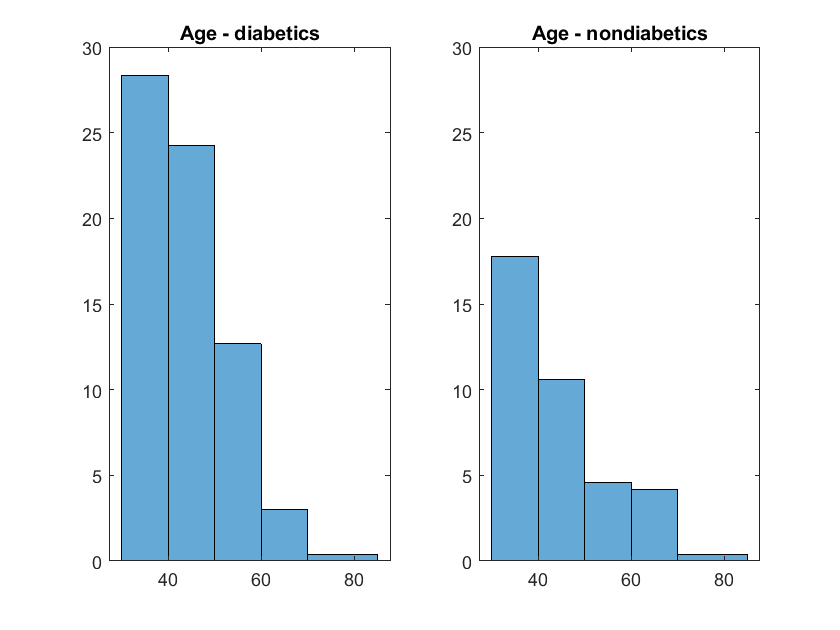

In [15]:
subplot(1,2,1)
histogram(age(outcome == 1), [30 40 50 60 70 85], Normalization = 'percentage')
title('Age - diabetics')

subplot(1,2,2)
histogram(age(outcome == 0), [30 40 50 60 70 85], Normalization = 'percentage')
title('Age - nondiabetics')
ylim([0 30])


<div class="alert alert-block alert-info"> 

I have found out that:
- the youngiest person is 21 years old
- the oldiest is 81 years old
  
- diabetes is more spread in the middle intervals, e.g. from 40 to 70 ears aproximately every second person has diabetes
- younger people have diabetes rarely
- it is interesting that diabetes is rare in higher age as well. I suppose it is due the fact that people with diabetes die on complications connected with diabetes.
    
</div>

<div class="alert alert-block alert-success">

Relation of **BMI and diabetes**

</div>


In [16]:
clear all 
load("diabetes.mat") 
whos 

  Name           Size            Bytes  Class     Attributes

  age          768x1              6144  double              
  bmi          768x1              6144  double              
  glucose      768x1              6144  double              
  insulin      768x1              6144  double              
  outcome      768x1              6144  double              



In [17]:
min(bmi)
max(bmi)

ans = 0

ans = 67.1000

In [18]:
fprintf('There is %d records with BMI = 0', size(find(bmi == 0), 1))


There is 11 records with BMI = 0

In [19]:
find(bmi == 0) %here I needn't to use [r,s], because there is only one column

ans = 11x1 double
    10
    50
    61
    82
   146
   372
   427
   495
   523
   685
...

In [20]:
bmi(find(bmi > 50))' % higher values - obese people

ans = 1x8 double
   53.2000   55.0000   67.1000   52.3000   52.3000   52.9000   59.4000   57.3000

We need to get rid of unreal values (BMI 0 doesn't exist)

In [21]:
outcome_cleared = outcome(bmi ~= 0);
bmi_cleared = bmi(bmi ~= 0);

In [80]:
min(bmi_cleared)
max(bmi_cleared)

ans = 18.2000

ans = 67.1000

In [22]:
bmi_dia = bmi_cleared(outcome_cleared == 1);
bmi_notDia = bmi_cleared(outcome_cleared == 0);

bmi_dia_avg = mean(bmi_dia);
bmi_dia_min = min(bmi_dia);
bmi_dia_max = max(bmi_dia);

bmi_notDia_avg = mean(bmi_notDia);
bmi_notDia_min = min(bmi_notDia);
bmi_notDia_max = max(bmi_notDia);

fprintf('Diabetics - average: %.2f, min: %.2f, max: %.2f \n', bmi_dia_avg, bmi_dia_min, bmi_dia_max)
fprintf('Others    - average: %.2f, min: %.2f, max: %.2f', bmi_notDia_avg, bmi_notDia_min, bmi_notDia_max)


Diabetics - average: 35.41, min: 22.90, max: 67.10 
Others    - average: 30.86, min: 18.20, max: 57.30

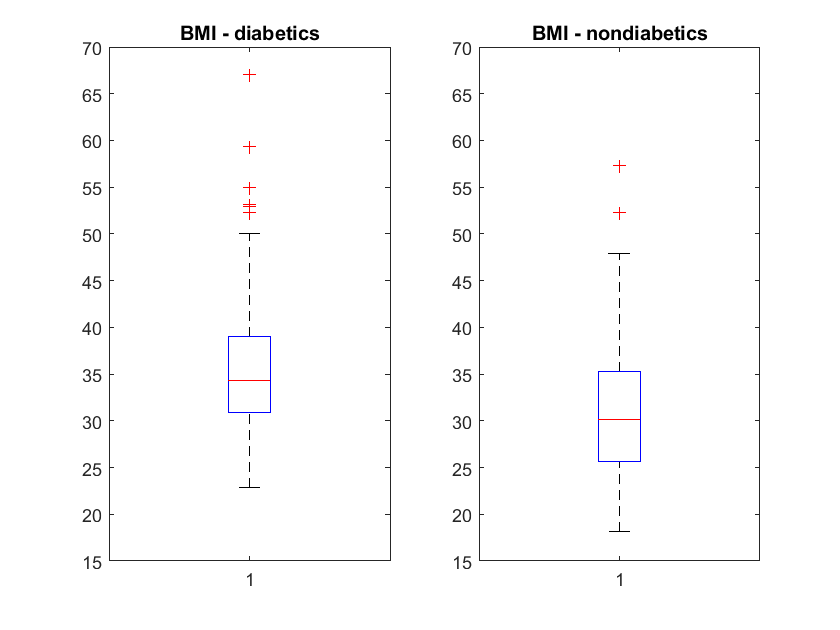

In [24]:
subplot(1,2,1)
boxplot(bmi_dia)
title('BMI - diabetics')
ylim([15 70])

subplot(1,2,2)
boxplot(bmi_notDia)
ylim([15 70])
title('BMI - nondiabetics')

<div class="alert alert-block alert-info"> 

We have found out that:
- diabetics have higher BMI in general
- extreme BMI over 50 is more often among diabetics

Notice: there were some unreal values BMI = 0, these were excluded before analysing the statistics
</div>

<div class="alert alert-block alert-success">

Relation of **Diabetes and glucose**

</div>


In [16]:
clear all 
load("diabetes.mat") 
whos 

  Name           Size            Bytes  Class     Attributes

  age          768x1              6144  double              
  bmi          768x1              6144  double              
  glucose      768x1              6144  double              
  insulin      768x1              6144  double              
  outcome      768x1              6144  double              



In [17]:
min(glucose)
max(glucose)

ans = 0

ans = 199

In [18]:
fprintf('There is %d records with glucose = 0', size(find(glucose == 0), 1))


There is 5 records with glucose = 0

In [19]:
find(glucose == 0) % here I needn't to use [r,s], because there is only one column

ans = 5x1 double
    76
   183
   343
   350
   503

We need to get rid of unreal values (glucose cannot be 0 --> death)

In [20]:
outcome_cleared = outcome(glucose ~= 0);
glucose_cleared = glucose(glucose ~= 0);

In [21]:
glu_dia = glucose_cleared(outcome_cleared == 1);
glu_notDia = glucose_cleared(outcome_cleared == 0);

glu_dia_avg = mean(glu_dia);
glu_dia_min = min(glu_dia);
glu_dia_max = max(glu_dia);

glu_notDia_avg = mean(glu_notDia);
glu_notDia_min = min(glu_notDia);
glu_notDia_max = max(glu_notDia);

fprintf('Diabetics - average: %.2f, min: %.2f, max: %.2f \n', glu_dia_avg, glu_dia_min, glu_dia_max)
fprintf('Others    - average: %.2f, min: %.2f, max: %.2f', glu_notDia_avg, glu_notDia_min, glu_notDia_max)


Diabetics - average: 142.32, min: 78.00, max: 199.00 
Others    - average: 110.64, min: 44.00, max: 197.00

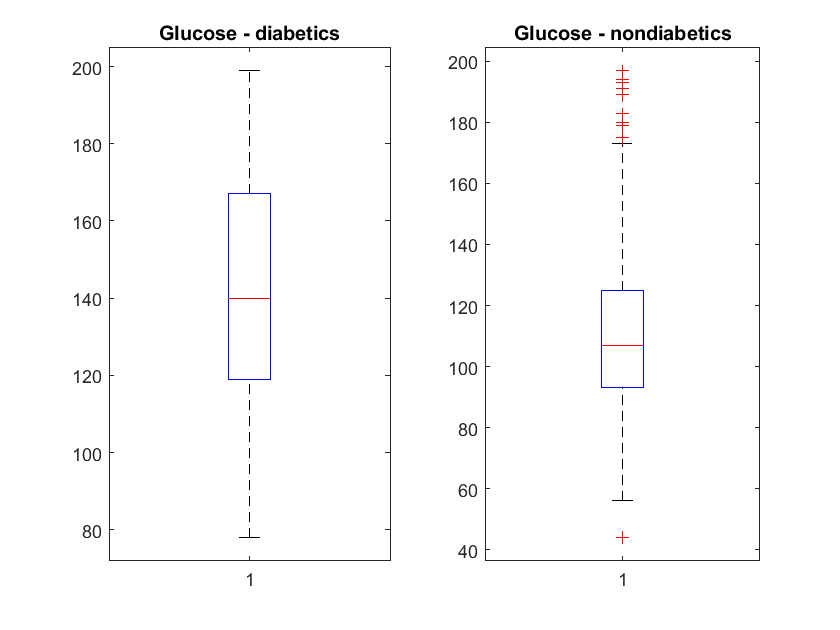

In [22]:
subplot(1,2,1)
boxplot(glu_dia)
title('Glucose - diabetics')

subplot(1,2,2)
boxplot(glu_notDia)
title('Glucose - nondiabetics')

<div class="alert alert-block alert-info"> 

We have found out that:
- diabetics have higher glucose in general
- but higher values around 200 were found among nondiabetics as well

Notice: there were some unreal values glucose = 0, these were excluded before analysing the statistics
</div>

<div class="alert alert-block alert-success">

Relation of **Diabetes and insulin**

</div>


In [23]:
clear all 
load("diabetes.mat") 
whos 

  Name           Size            Bytes  Class     Attributes

  age          768x1              6144  double              
  bmi          768x1              6144  double              
  glucose      768x1              6144  double              
  insulin      768x1              6144  double              
  outcome      768x1              6144  double              



In [24]:
min(insulin)
max(insulin)

ans = 0

ans = 846

In [25]:
fprintf('There is %d records with insulin = 0', size(find(insulin == 0), 1))


There is 374 records with insulin = 0

<div class="alert alert-block alert-danger"> 

It's quite strange that 374 people has level of insulin = 0. This is not real. Healthy person has normal value of insulin abou 5 - 15 mIU/L (30 - 90 pmol/L). 
    Diabetic have "artificial" insulin in blood. (can has own insulin as well)
    
</div>

So, I'd like to explore, if these data are for diabetics or nondiabetics

In [26]:
outcome_ins0 = outcome(insulin == 0);

ins0_dia = size(outcome_ins0(outcome_ins0 == 1), 1);
ins0_notDia = size(outcome_ins0(outcome_ins0 == 0), 1);

ratio_dia = 100 * ins0_dia / size(outcome(outcome == 1), 1);
ratio_notDia = 100 * ins0_notDia / size(outcome(outcome == 0), 1);

fprintf('There %.2f percent of diabetics %.2f percent of non-diabetics that have 0 of insulin in their blood.', ratio_dia, ratio_notDia)

There 51.49 percent of diabetics 47.20 percent of non-diabetics that have 0 of insulin in their blood.

<div class="alert alert-block alert-danger"> 

The results are quite suprising. 138 diabetics and 236 nondiabetics have "supposedly" 0 insuline in their blood. So, further results are not very believable.
    
</div>

In [27]:
ins_dia = insulin(outcome == 1);
ins_notDia = insulin(outcome == 0);

ins_dia_avg = mean(ins_dia);
ins_dia_min = min(ins_dia);
ins_dia_max = max(ins_dia);

ins_notDia_avg = mean(ins_notDia);
ins_notDia_min = min(ins_notDia);
ins_notDia_max = max(ins_notDia);

fprintf('Diabetics - average: %.2f, min: %.2f, max: %.2f \n', ins_dia_avg, ins_dia_min, ins_dia_max)
fprintf('Others    - average: %.2f, min: %.2f, max: %.2f', ins_notDia_avg, ins_notDia_min, ins_notDia_max)


Diabetics - average: 100.34, min: 0.00, max: 846.00 
Others    - average: 68.79, min: 0.00, max: 744.00

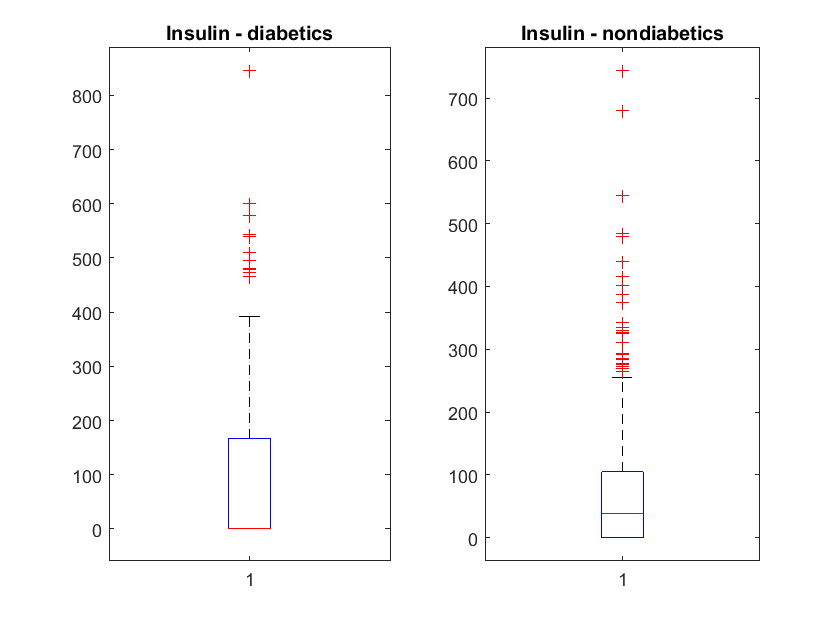

In [28]:
subplot(1,2,1)
boxplot(ins_dia)
title('Insulin - diabetics')
subplot(1,2,2)
boxplot(ins_notDia)
title('Insulin - nondiabetics')

<div class="alert alert-block alert-info"> 

We can see that: <br>
    - minimum value of insulin in both groups is 0 - it is strange as I have noticed before <br>
    - maximum is not very different in both groups, although in dia group is higher <br>
    - the same is valid for minimum
    
</div>